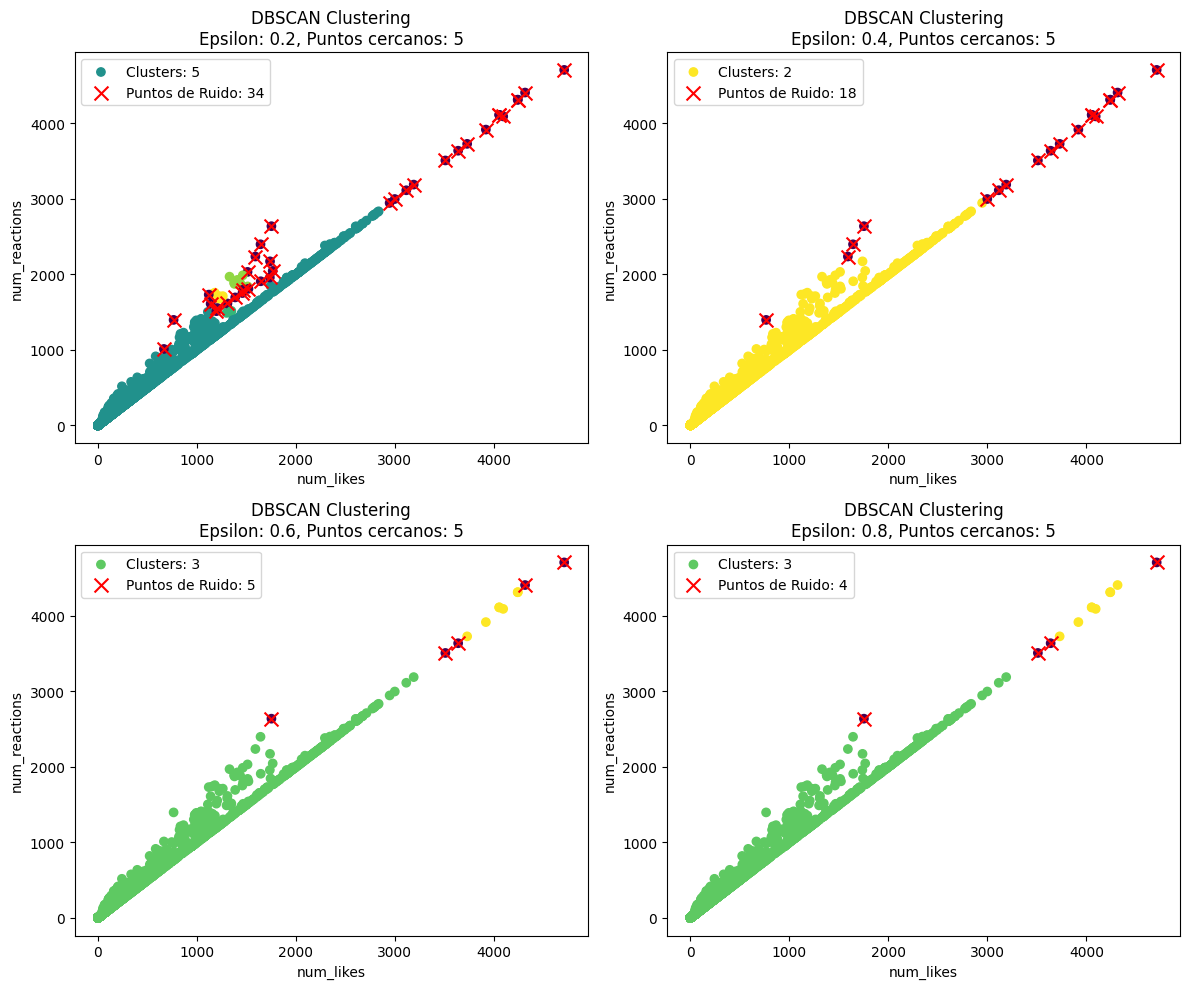

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree

def dbscan_epsilon(archivo_csv, columnas, epsilon_values, min_samples):
    def dbscan(datos, epsilon, min_pts):
        etiquetas = np.full(len(datos), -1, dtype=int) 
        cluster_id = 0
        tree = cKDTree(datos)
        for i in range(len(datos)):
            if etiquetas[i] != -1:
                continue 
            vecinos = tree.query_ball_point(datos[i], epsilon)
            if len(vecinos) < min_pts:
                etiquetas[i] = -2  # Etiqueta para puntos de ruido
            else:
                cluster_id += 1
                expandir_cluster(datos, etiquetas, i, vecinos, cluster_id, epsilon, min_pts, tree)
        return etiquetas

    def expandir_cluster(datos, etiquetas, punto_actual, vecinos, cluster_id, epsilon, min_pts, tree):
        etiquetas[punto_actual] = cluster_id
        i = 0
        while i < len(vecinos):
            punto = vecinos[i]
            if etiquetas[punto] == -1:
                vecinos_vecinos = tree.query_ball_point(datos[punto], epsilon)
                if len(vecinos_vecinos) >= min_pts:
                    vecinos.extend(vecinos_vecinos)
            if etiquetas[punto] == -1 or etiquetas[punto] == -2:
                etiquetas[punto] = cluster_id
            i += 1
    data = pd.read_csv(archivo_csv)
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.ravel()
    for idx, epsilon in enumerate(epsilon_values):
        X = data[columnas].values
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_scaled = (X - mean) / std
        dbscan_labels = dbscan(X_scaled, epsilon, min_samples)
        data['DBSCAN_Labels'] = dbscan_labels
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        num_noise_points = list(dbscan_labels).count(-2)  # Puntos de ruido
        noise_points = data[data['DBSCAN_Labels'] == -2]
        axs[idx].scatter(data[columnas[0]], data[columnas[1]], c=dbscan_labels, cmap='viridis', label=f'Clusters: {num_clusters}')
        axs[idx].scatter(noise_points[columnas[0]], noise_points[columnas[1]], c='red', marker='x', s=100, label=f'Puntos de Ruido: {num_noise_points}')
        axs[idx].set_xlabel(columnas[0])
        axs[idx].set_ylabel(columnas[1])
        axs[idx].set_title(f'DBSCAN Clustering\nEpsilon: {epsilon}, Puntos cercanos: {min_samples}')
        axs[idx].legend()
    plt.tight_layout()
    plt.show()
    
archivo_csv = 'live.csv'
columnas_seleccionadas = ['num_likes', 'num_reactions']
epsilon_values = [0.2, 0.4, 0.6, 0.8]
min_samples = 5
dbscan_epsilon(archivo_csv, columnas_seleccionadas, epsilon_values, min_samples)


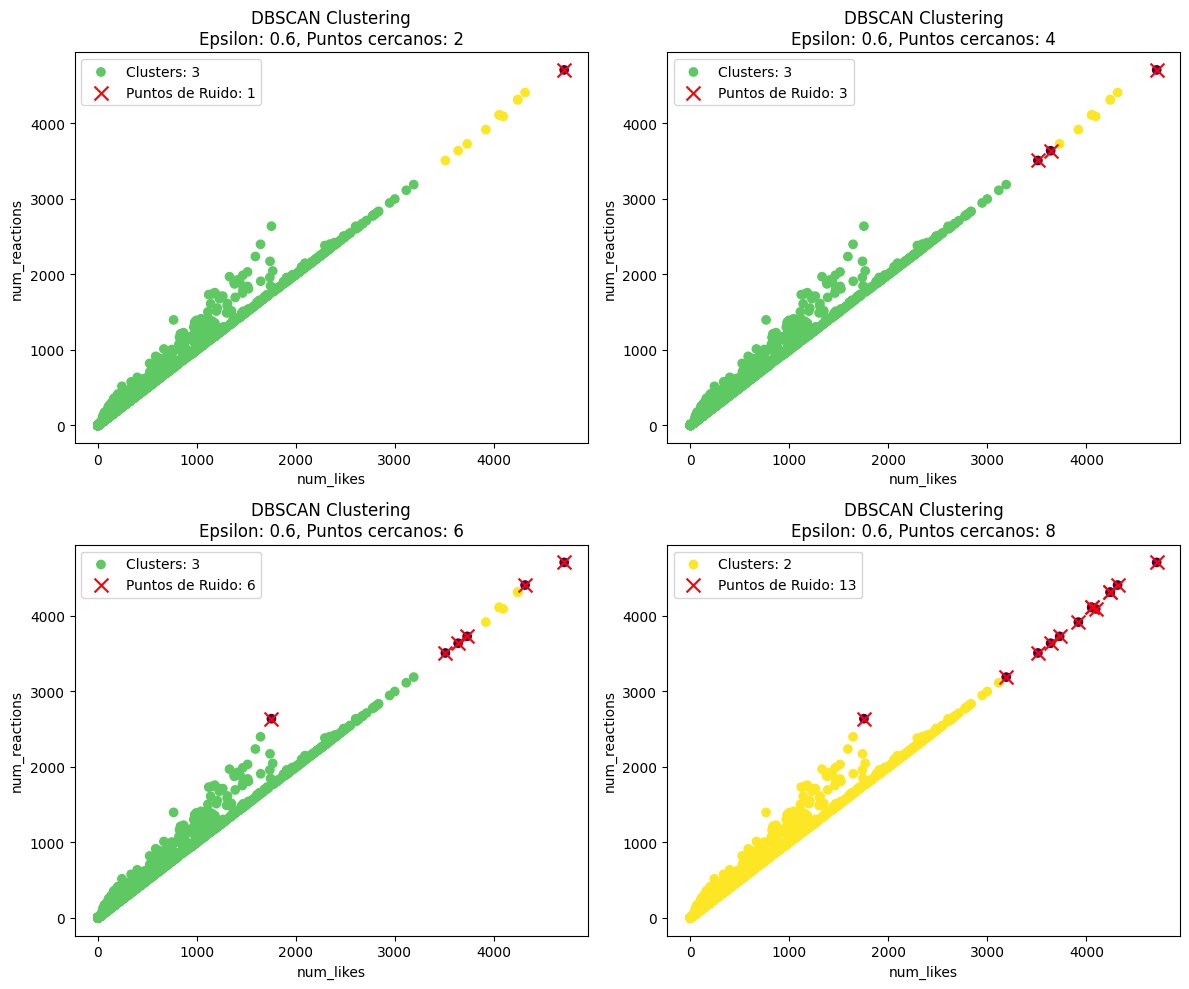

In [23]:
def dbscan_samples(archivo_csv, columnas, epsilon, min_samples_values):
    def dbscan(datos, epsilon, min_pts):
        etiquetas = np.full(len(datos), -1, dtype=int) 
        cluster_id = 0
        tree = cKDTree(datos)
        for i in range(len(datos)):
            if etiquetas[i] != -1:
                continue 
            vecinos = tree.query_ball_point(datos[i], epsilon)
            if len(vecinos) < min_pts:
                etiquetas[i] = -2  # Etiqueta para puntos de ruido
            else:
                cluster_id += 1
                expandir_cluster(datos, etiquetas, i, vecinos, cluster_id, epsilon, min_pts, tree)

        return etiquetas
    
    def expandir_cluster(datos, etiquetas, punto_actual, vecinos, cluster_id, epsilon, min_pts, tree):
        etiquetas[punto_actual] = cluster_id
        i = 0
        while i < len(vecinos):
            punto = vecinos[i]
            if etiquetas[punto] == -1:
                vecinos_vecinos = tree.query_ball_point(datos[punto], epsilon)
                if len(vecinos_vecinos) >= min_pts:
                    vecinos.extend(vecinos_vecinos)
            if etiquetas[punto] == -1 or etiquetas[punto] == -2:
                etiquetas[punto] = cluster_id
            i += 1
            
    data = pd.read_csv(archivo_csv)
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.ravel()
    for idx, min_samples in enumerate(min_samples_values):
        X = data[columnas].values
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_scaled = (X - mean) / std
        dbscan_labels = dbscan(X_scaled, epsilon, min_samples)
        data['DBSCAN_Labels'] = dbscan_labels
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        num_noise_points = list(dbscan_labels).count(-2)  # Puntos de ruido
        noise_points = data[data['DBSCAN_Labels'] == -2]
        axs[idx].scatter(data[columnas[0]], data[columnas[1]], c=dbscan_labels, cmap='viridis', label=f'Clusters: {num_clusters}')
        axs[idx].scatter(noise_points[columnas[0]], noise_points[columnas[1]], c='red', marker='x', s=100, label=f'Puntos de Ruido: {num_noise_points}')
        axs[idx].set_xlabel(columnas[0])
        axs[idx].set_ylabel(columnas[1])
        axs[idx].set_title(f'DBSCAN Clustering\nEpsilon: {epsilon}, Puntos cercanos: {min_samples}')
        axs[idx].legend()
    plt.tight_layout()
    plt.show()
    
archivo_csv = 'live.csv'
columnas_seleccionadas = ['num_likes', 'num_reactions']
epsilon = 0.6
min_samples_values = [2, 4, 6, 8]
dbscan_samples(archivo_csv, columnas_seleccionadas, epsilon, min_samples_values)
